### Twitter Sentiments

The dataset consists of a test and train set. The training set comprises a list of 31,962 tweets, a corresponding id and label 0 or 1 for each tweet. The particular sentiment you are asked to identify in this problem is wether or not the tweet is racist or sexist (in which case it will be labelled as 1).

#### Import DataSet

In [1]:
import pandas as pd

train = pd.read_csv('train_E6oV3lV.csv')
print("Training Set:"% train.columns, train.shape, len(train))
test = pd.read_csv('test_tweets_anuFYb8.csv')
print("Test Set:"% test.columns, test.shape,len(test))

Training Set: (31962, 3) 31962
Test Set: (17197, 2) 17197


### Remove unnecessary noise from test data. 

Since our input data are tweets, they contains characters like @,#,% etc. 
These charaters wont make any sense to ML. So lets get rid of them
Also we do not want same word to be treated differently because of case sensitivity.

In [2]:
import re

def clean_data(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","",
                                                              elem))    
    return df

test_clean = clean_data(test,"tweet")
train_clean = clean_data(train,"tweet")

In [3]:
train_clean.head(5)

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


In [4]:
test_clean.head(5)

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...


Lets check how many 0's and 1's we have in dataset.

In [5]:
(train['label']).value_counts()

0    29720
1     2242
Name: label, dtype: int64

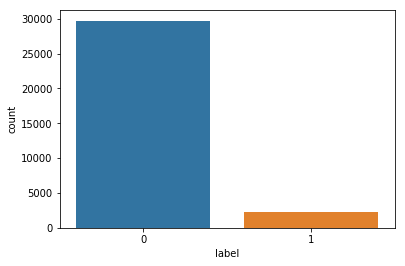

In [7]:
import matplotlib as plt # to plot graph
import seaborn as sns #for intractive graphs

sns.countplot("label",data=train)

In [8]:
percetageOfGoodLabels = len(train[train["label"] == 0])/len(train["label"])
percetageOfBadLabels = len(train[train["label"] == 1])/len(train["label"])

print("percetage Of 0 Labels -> {0} %".format(round(percetageOfGoodLabels*100,2)))
print("percetage Of 1 Labels -> {0} %".format(round(percetageOfBadLabels*100,2)))

percetage Of 0 Labels -> 92.99 %
percetage Of 1 Labels -> 7.01 %


With this uneven data as input our model will become baised towards 0 and will treat everything as 0.

### Handling Imbalanced Classes using sampling

#### upsampling

We use a function that repeatdly takes samples, with replacement from 
the minority class until the class is the same size as the majority. 


Makes minority sample as majority

In [14]:
from sklearn.utils import resample

train_majority = train_clean[train_clean.label == 0]
train_minority = train_clean[train_clean.label == 1]

train_minority_unsampled = resample(train_minority, replace = True, n_samples=len(train_majority),random_state=123)

train_upsampled = pd.concat([train_minority_unsampled, train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

#### DownSampling

Takes the sample from majority class, without replacement until it is same size of the minority
class. 

In [15]:
train_majority = train_clean[train_clean.label == 0]
train_minority = train_clean[train_clean.label == 1]

train_majority_downsampled = resample(train_majority, replace=True, n_samples = len(train_minority), random_state=123)

train_downsampled = pd.concat([train_majority_downsampled, train_minority])
train_downsampled['label'].value_counts()

1    2242
0    2242
Name: label, dtype: int64

### Training Model

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('nb',SGDClassifier())])

Split training data into training and test set

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],train_upsampled['label'],random_state=0)

#### Train the model

In [21]:
model = pipeline_sgd.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9690460306871247